In [59]:
import math
import random
import numpy as np
import pandas as pd
import seaborn as sns
import pystan
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [27]:
df = pd.read_csv("data/data_20160802.csv", sep="\t", encoding="utf-8")
df["date"] = df["Year"].astype(str) + "-" + df["Month"].astype(str) + "-" + df["Day"].astype(str)

In [29]:
df.head()

,Year,Month,Day,Wday,D1,D2,s,week,Weather,Rain_val,rain,Event.flag,Head.count,Event_val,event,trend,ar,sale.hidden,Sale,date
0,2012,1,1,0,0,0,-5.058226,-5.058226,1,0.0,0.00,0,0,0.000000,0.000000,60.81145,-12.339740,43.413484,39.224899,2012-1-1
1,2012,1,2,1,1,0,12.332990,-5.058226,1,0.0,0.00,1,7800,0.000000,0.000000,60.90692,-11.217950,44.630744,44.042688,2012-1-2
2,2012,1,3,2,1,0,-5.064917,-5.058226,1,0.0,0.00,0,0,0.000000,0.000000,61.05012,-0.480769,55.511124,51.803511,2012-1-3
3,2012,1,4,3,0,0,-5.382135,-5.382135,2,0.1,1.17,1,19400,0.745389,37.828492,61.43198,-0.160256,94.888081,92.846346,2012-1-4
4,2012,1,5,4,0,0,13.224172,13.224172,1,0.0,0.00,1,32000,0.943871,48.137430,61.62291,4.967949,127.952461,126.063607,2012-1-5


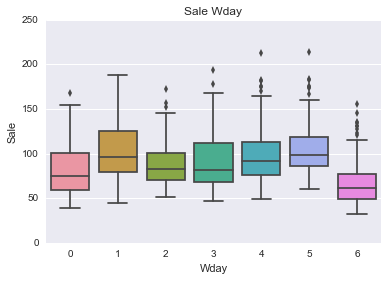

In [10]:
plt.title("Sale Wday")
sns.boxplot(x="Wday",y="Sale",data=df)

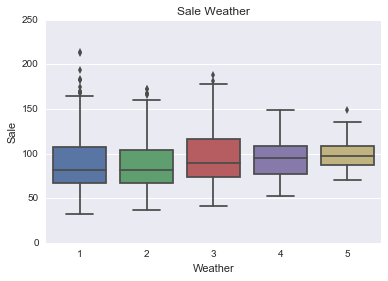

In [11]:
plt.title("Sale Weather")
sns.boxplot(x="Weather",y="Sale",data=df)

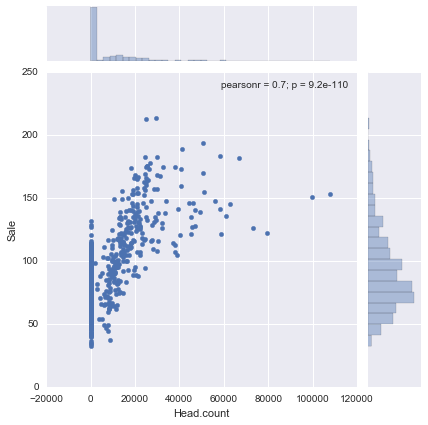

In [12]:
sns.jointplot("Head.count", "Sale", data=df)

In [80]:
df_tmp = df[["Wday", "Weather", "rain", "Head.count", "Sale"]]
df_tmp = pd.concat([df_tmp,  pd.get_dummies(df_tmp["Weather"],prefix="weather")], axis=1)
df_tmp = pd.concat([df_tmp,  pd.get_dummies(df_tmp["Wday"],prefix="weekday")], axis=1)
df_tmp = df_tmp.drop("Wday", axis=1)
df_tmp = df_tmp.drop("Weather", axis=1)
y = df_tmp["Sale"].as_matrix()
X = df_tmp.drop("Sale", axis=1).as_matrix()
#重回帰分析
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
# clf.normalize = True
clf.fit(X, y)
#係数
print("coef")
print(pd.DataFrame({"name":df_tmp.drop("Sale", axis=1).columns,"coef":clf.coef_}))
# 切片
print("intercept")
print(clf.intercept_)
# 決定係数
print("score")
print(clf.score(X, y))

coef
         coef        name
0    0.689834        rain
1    0.001611  Head.count
2    0.220387   weather_1
3   -1.083942   weather_2
4    1.392401   weather_3
5   -1.011332   weather_4
6    0.482486   weather_5
7   -9.243511   weekday_0
8   10.354758   weekday_1
9    1.188431   weekday_2
10  -3.251868   weekday_3
11   6.533176   weekday_4
12  12.270404   weekday_5
13 -17.851389   weekday_6
intercept
77.24503498
score
0.599893413683


In [76]:
X2 = df_tmp.loc[:, ["Head.count"]].as_matrix()
y2 = df_tmp["Sale"].as_matrix()
clf2 = LinearRegression()
# clf.normalize = True
clf2.fit(X2, y2)
#係数
print(clf2.coef_)
# 切片
print(clf2.intercept_)
# 決定係数
print(clf2.score(X2, y2))

[ 0.00167707]
78.3570343382
0.493427740072


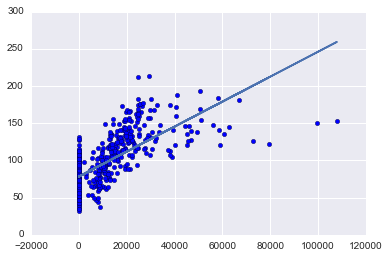

In [78]:
plt.scatter(X2, y2)
plt.plot(X2, clf2.predict(X2))

# ガンマ分布でglmしてみる。

In [82]:
import statsmodels.api as sm
x2 = sm.add_constant(X2)


In [96]:
model = sm.GLM(endog=y2, exog=x2, family=sm.families.())
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  731
Model:                            GLM   Df Residuals:                      729
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                   520.193393388
Method:                          IRLS   Log-Likelihood:                -3322.2
Date:                Wed, 03 Aug 2016   Deviance:                   3.7922e+05
Time:                        00:38:16   Pearson chi2:                 3.79e+05
No. Iterations:                     4                                         
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         78.3570      0.981     79.876      0.000        76.434    80.280
x1             0.0017   6.29e-05     26.647      0.000         0.002     0.002
==============================================================================
"""

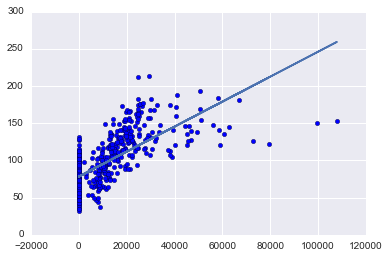

In [97]:
plt.scatter(X2, y2)
plt.plot(X2, results.fittedvalues)

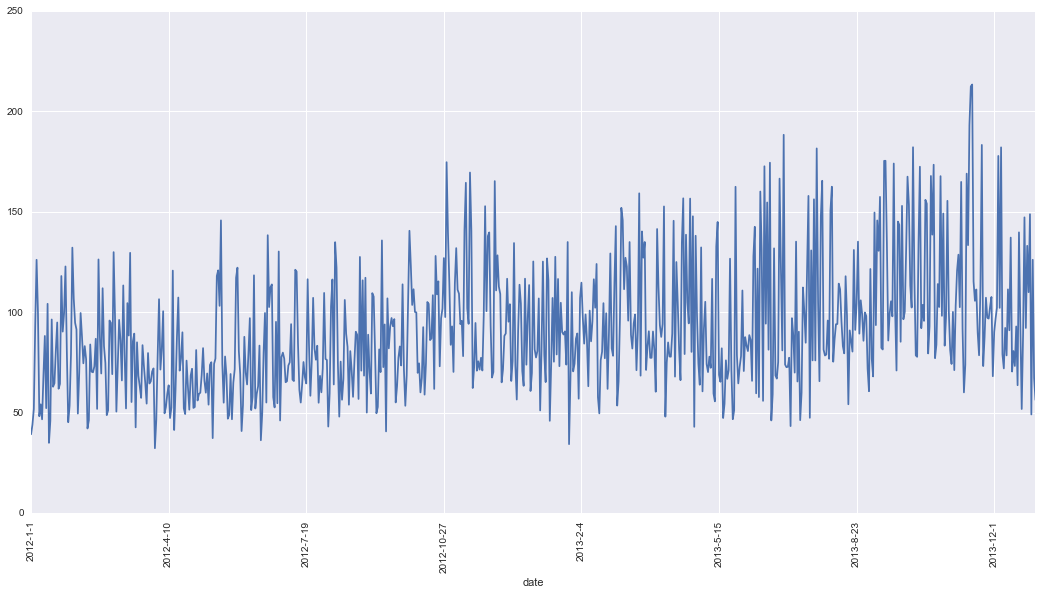

In [33]:
plt.figure(figsize=(18,9))
df.set_index("date")["Sale"].plot(rot=90)

In [ ]:
import 